In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_4.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
print(len(data[data["class"]=="human"])/7)
print(len(data.loc[0:60364,:]))

62515.28571428572
60365


In [ ]:
DS={}
human=data[data["class"]=="human"]
human.reset_index(drop=True,inplace=True)
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],human.loc[60364*(ds_index-1):60364*ds_index-1,:]])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



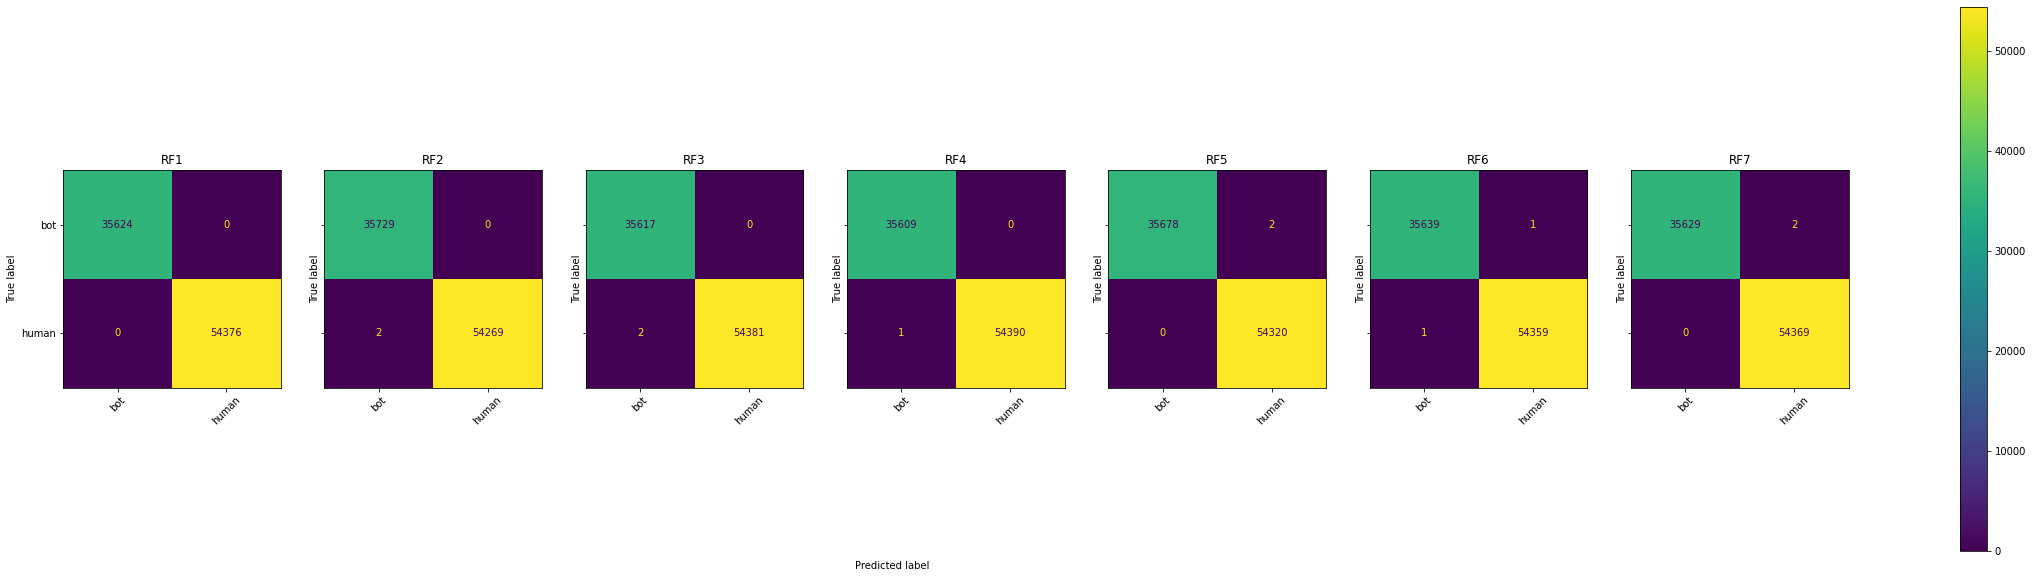

In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
from numpy.lib.function_base import average
for ds_index in range(1,8):
  # print(classification_report(y["train"+str(ds_index)], y_predict["train"+str(ds_index)],output_dict=True))
  print(classification_report(y["train"+str(ds_index)], y_predict["train"+str(ds_index)]))
  

              precision    recall  f1-score   support

         bot       1.00      1.00      1.00     35624
       human       1.00      1.00      1.00     54376

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

         bot       1.00      1.00      1.00     35729
       human       1.00      1.00      1.00     54271

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

         bot       1.00      1.00      1.00     35617
       human       1.00      1.00      1.00     54383

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

              preci

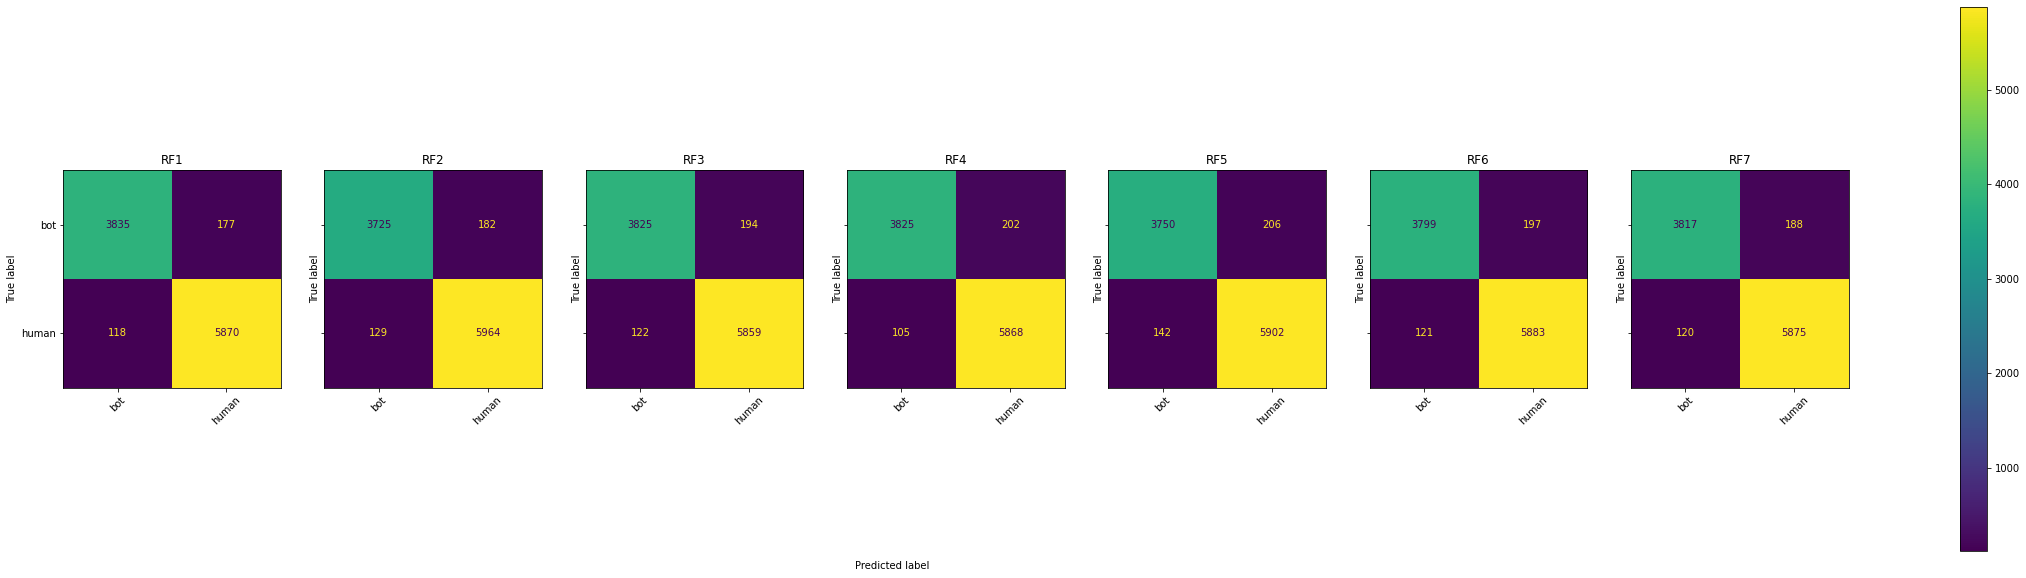

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test"+str(i+1)])
    cf_matrix = confusion_matrix(y["test"+str(i+1)], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

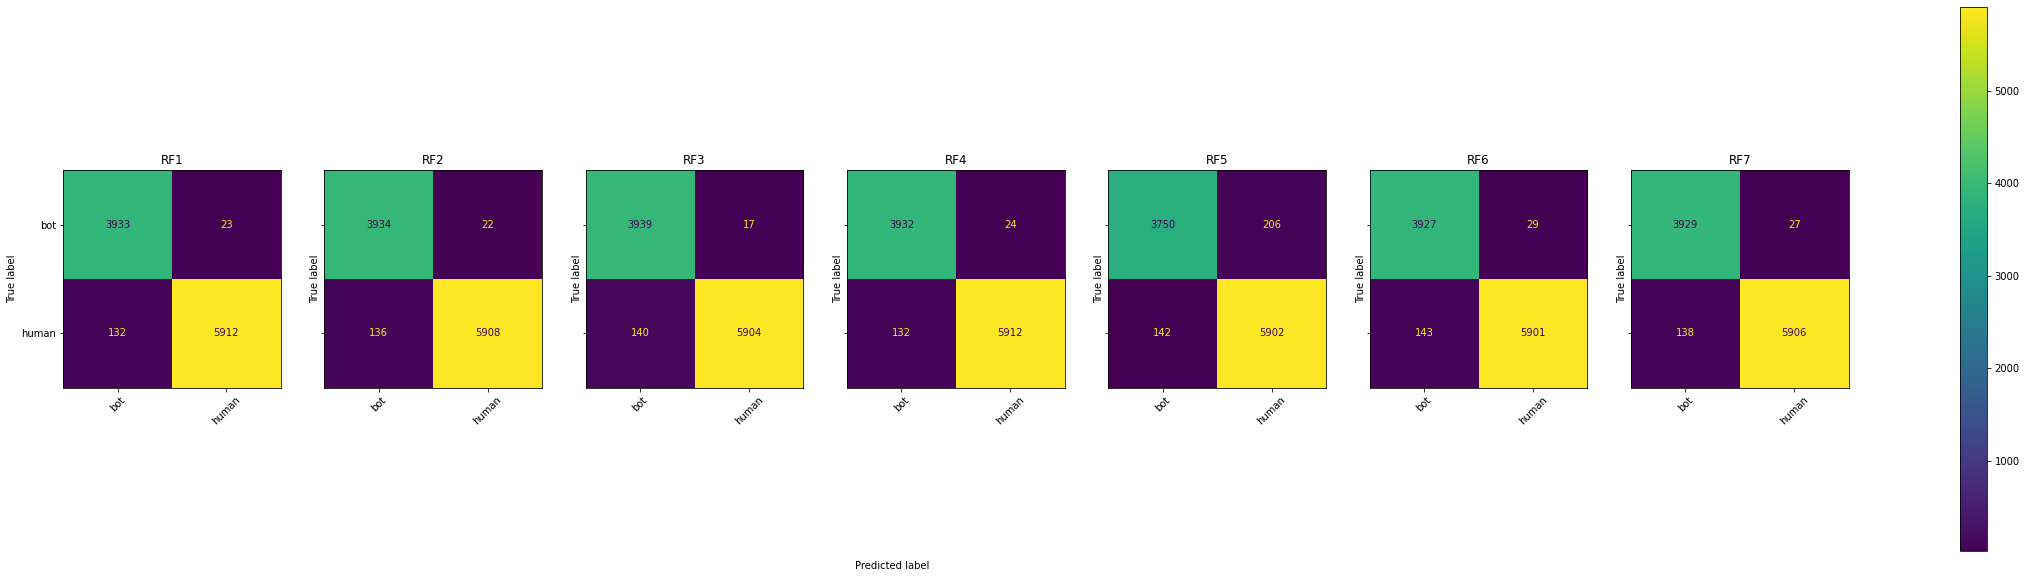

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test5"])
    cf_matrix = confusion_matrix(y["test5"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
for ds_index in range(1,8):
  print(classification_report(y["test"+str(ds_index)], y_predict["test"+str(ds_index)]))

              precision    recall  f1-score   support

         bot       0.41      0.42      0.41      4012
       human       0.61      0.60      0.60      5988

    accuracy                           0.53     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.53      0.53      0.53     10000

              precision    recall  f1-score   support

         bot       0.40      0.41      0.40      3907
       human       0.61      0.60      0.60      6093

    accuracy                           0.52     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.53      0.52      0.53     10000

              precision    recall  f1-score   support

         bot       0.40      0.40      0.40      4019
       human       0.60      0.59      0.59      5981

    accuracy                           0.52     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.52      0.52      0.52     10000

              preci

In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)
print(type(output_prediction))
print(len(output_prediction))

<class 'numpy.ndarray'>
10000


              precision    recall  f1-score   support

         bot       0.40      0.42      0.41      3907
       human       0.61      0.60      0.60      6093

    accuracy                           0.52     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.53      0.52      0.53     10000



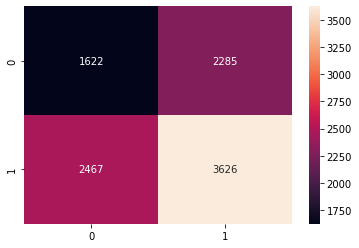

In [ ]:
print(classification_report(y["test2"], output_prediction))
cm = confusion_matrix(y["test2"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")